## **3. Sampling in Python**

**Sampling in Python** is the cornerstone of inference statistics and hypothesis testing. It's a powerful skill used in survey analysis and experimental design to draw conclusions without surveying an entire population.

### **3.1. Introduction to Sampling**

The **population** is the complete dataset and the **sample** is the subset of data you calculate on.


### **3.2. Sampling Methods**

Here we will exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.



#### **Sampling and Point Estimates**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
spotify_population = pd.read_feather('../datasets/spotify_2000_2020.feather')
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [4]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140899896
3.8644755333333336


#### **Convenience Samling**

Convenience Samling aren't representative for the population!

#### **Pseudo-random number generation**

- Pseudo-random generation is cheap and fast
- Next "random" number calculated from previous "random" number
- The first "random" number calculated from a seed 
- The same seed value yields the same random numbers 

**The process is deterministic, the trick to a random number generator is to make it look like the values are random**

In [6]:
randoms = np.random.beta(a=2,b=2, size = 5000)
randoms

array([0.4058321 , 0.18764361, 0.70440266, ..., 0.20387936, 0.43832336,
       0.5905719 ])

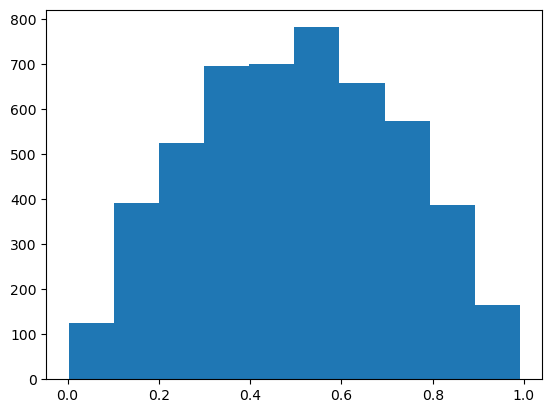

In [7]:
plt.hist(randoms)
plt.show()

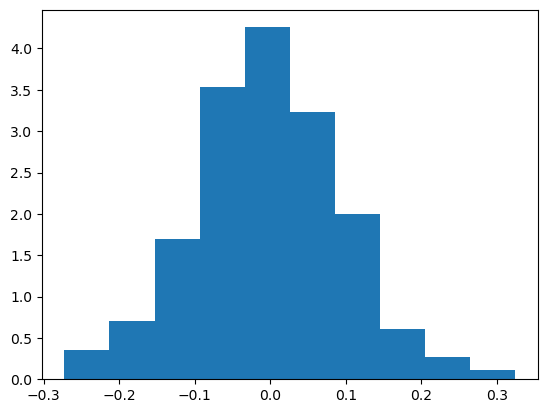

In [8]:
mu, sigma = 0, 0.1 
normal = np.random.normal(mu, sigma, 1000)
plt.hist(normal, density=True)
plt.show()


### **3.2. Sampling Methods**

### **3.3. Sampling Distributions**

### **3.4. Bootstrap Distributions**